In [64]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  #standartlaştırma için eklendi
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from warnings import filterwarnings
filterwarnings('ignore')

In [45]:
df=pd.read_csv(r"C:\Users\Onur\Desktop\Turkcell_Machinelearning\Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']])

y=df["Salary"]
x_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')

x=pd.concat([x_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25,random_state=42)

In [46]:
x_train=pd.DataFrame(x_train['Hits'])
x_test=pd.DataFrame(x_test['Hits'])


In [47]:
cart_model=DecisionTreeRegressor(max_leaf_nodes=10)  #dallanma kontrolü için paarametre veriyoruz. maks yaprak nodes yapısı

In [48]:
cart_model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [49]:
#ağaç yapısının görselleştirilmesi

Text(0, 0.5, 'maaş-Salary-')

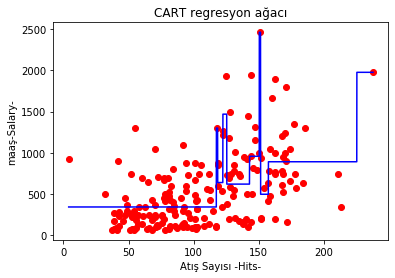

In [50]:
x_grid=np.arange(min(np.array(x_train)),max(np.array(x_train)),0.01)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_grid,cart_model.predict(x_grid),color='blue')

plt.title('CART regresyon ağacı')
plt.xlabel('Atış Sayısı -Hits-')
plt.ylabel('maaş-Salary-')

Tek Değişkenli Tahmin

In [51]:
cart_model.predict(x_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [52]:
y_pred=cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

Tüm Değişkenli

In [83]:
df=pd.read_csv(r"C:\Users\Onur\Desktop\Turkcell_Machinelearning\Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']])

y=df["Salary"]
x_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')

x=pd.concat([x_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25,random_state=42)

In [54]:
cart_model=DecisionTreeRegressor().fit(x_train,y_train)

In [55]:
y_pred=cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

457.9674315454963

MODEL TUNİNG

In [65]:
cart_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [71]:
cart_model=DecisionTreeRegressor(max_depth=5).fit(x_train,y_train)
y_pred=cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

463.4568155290018

In [72]:
?cart_model  #detaylı bilgi

Type:        DecisionTreeRegressor
String form:
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
           max_feat <...> raction_leaf=0.0, presort='deprecated',
           random_state=None, splitter='best')
File:        c:\users\onur\anaconda3\envs\test_conda_env\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each terminal node.

    .. versionadded:: 0.18
     

In [73]:
cart_params={'max_depth':[2,3,4,5,10,20],
            'min_samples_split':[2,10,5,30,50,10]}


In [84]:
cart_model=DecisionTreeRegressor()

In [85]:
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10).fit(x_train,y_train)

In [86]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 50}

In [87]:
#final MODEL

In [90]:
cart_tuned=DecisionTreeRegressor(max_depth=cart_cv_model.best_params_['max_depth'],min_samples_split=cart_cv_model.best_params_['min_samples_split']).fit(x_train,y_train)

In [91]:
y_pred=cart_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

361.0876906511434